In [1]:
# tf & keras & VGG19 libs
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.applications.vgg19 import preprocess_input

2022-11-28 06:55:24.659413: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# Load train and test set
train_dir = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Train'
test_dir = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Test'
val_dir = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'

# Image size
IMG_SIZE = (224, 224)

In [3]:
# augmentation
DataGen = ImageDataGenerator(rotation_range=45,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       rescale=1/255.0)

Train_data = DataGen.flow_from_directory(train_dir, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=200, 
                                         shuffle=True,
                                         class_mode="categorical")

Test_data = DataGen.flow_from_directory(test_dir, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=64, 
                                         shuffle=True,
                                         class_mode="categorical")

Validation_data = DataGen.flow_from_directory(val_dir, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=64, 
                                         shuffle=True,
                                         class_mode="categorical")

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [4]:
# Initialize the model in sequential
model = Sequential()

# Transfer Learning Model VGG19
vgg19 = VGG19(input_shape=(224,224,3), 
                         include_top=False,
                         weights="imagenet")

# make pre trained model into non trainable bcoz its takes much time
for layer in vgg19.layers:
    layer.trainable = False

# add vgg19 model into our sequence model
model.add(vgg19)

# flatten the model
model.add(Flatten())

# Adding dense layers
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))

# Adding output layers
model.add(Dense(2, activation='sigmoid', kernel_initializer="glorot_uniform"))

# Finaly compile the model...
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


2022-11-28 06:55:34.468373: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-28 06:55:34.473449: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-28 06:55:34.586150: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 06:55:34.587088: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-11-28 06:55:34.587298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-2

80142336/80134624 [==============================] - 0s 0us/step


In [5]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 23,236,034
Trainable params: 3,211,650
Non-trainable params: 20,024,384
_________________________________________________________________


In [6]:
Model = model.fit(Train_data, validation_data=(Validation_data), epochs=5)

2022-11-28 06:55:42.416865: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-11-28 06:55:42.422519: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000200000 Hz


Epoch 1/5


2022-11-28 06:55:43.189221: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-11-28 06:55:44.843377: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-11-28 06:55:47.760011: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


50/50 [==============================] - 255s 5s/step - loss: 2.1336 - accuracy: 0.6872 - val_loss: 0.1983 - val_accuracy: 0.9075
Epoch 2/5
50/50 [==============================] - 174s 3s/step - loss: 0.1462 - accuracy: 0.9469 - val_loss: 0.1473 - val_accuracy: 0.9413
Epoch 3/5
50/50 [==============================] - 173s 3s/step - loss: 0.1099 - accuracy: 0.9602 - val_loss: 0.0994 - val_accuracy: 0.9688
Epoch 4/5
50/50 [==============================] - 174s 3s/step - loss: 0.0985 - accuracy: 0.9644 - val_loss: 0.1156 - val_accuracy: 0.9538
Epoch 5/5
50/50 [==============================] - 173s 3s/step - loss: 0.0915 - accuracy: 0.9670 - val_loss: 0.1061 - val_accuracy: 0.9538


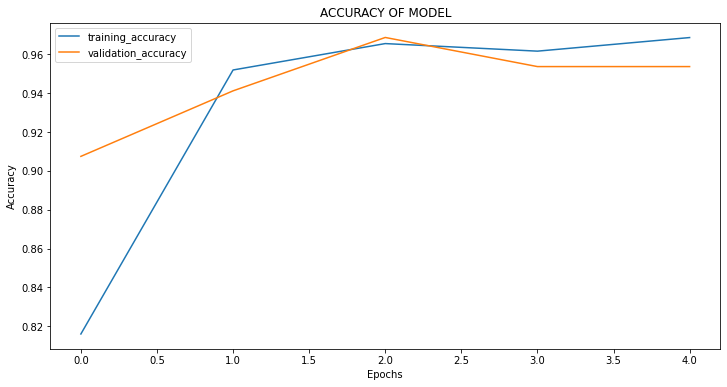

In [7]:
import matplotlib.pyplot as plt

# accuracy of our model
plt.figure(figsize=(12, 6))
plt.plot(Model.history["accuracy"])
plt.plot(Model.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY OF MODEL")
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()

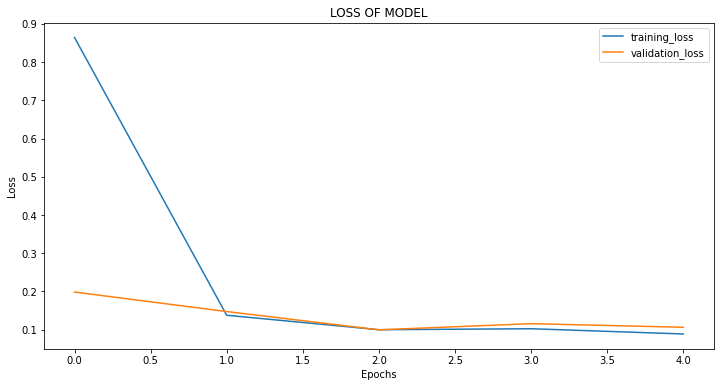

In [8]:
# loss of our model
plt.figure(figsize=(12, 6))
plt.plot(Model.history["loss"])
plt.plot(Model.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS OF MODEL")
plt.legend(['training_loss', 'validation_loss'])
plt.show()

In [9]:
model.save("anudari-mask-nomask-v2.h5")